In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import cv2
from fastai import *
from fastai.vision import *

### Drive Dataset

[Drive](https://drive.grand-challenge.org/)

In [19]:
path = Path('Exp1/task/')

In [20]:
def get_y_fn(x):
    return x.parent.parent.parent/'labels'/x.name.replace("tif","png")

In [21]:
tfms = get_transforms(do_flip=True,
                      flip_vert=True,
                      max_rotate=90,
                      #max_lighting=0.0,
                      max_zoom=2,
                      #max_warp=0.0,
                      #p_affine=0.5,
                      #p_lighting=0.0,
                      #xtra_tfms=xtra_tfms,
                     )

In [22]:
files = get_image_files(path, recurse=True)
def spit_func(x):
    return x in val_files

In [23]:
train_files = [] 
[train_files.extend(files[:2]) for i in range(15)]
train_files
val_files = files[2:]

In [24]:
valid = SegmentationItemList(val_files)
train = SegmentationItemList(train_files)

item_list = ItemLists(path, train, valid)
item_list = item_list.label_from_func(get_y_fn, classes=['Bg', 'Fg'])
data = item_list.transform(tfms, size=512, tfm_y=True)
data = data.databunch(bs=4)
data = data.normalize()

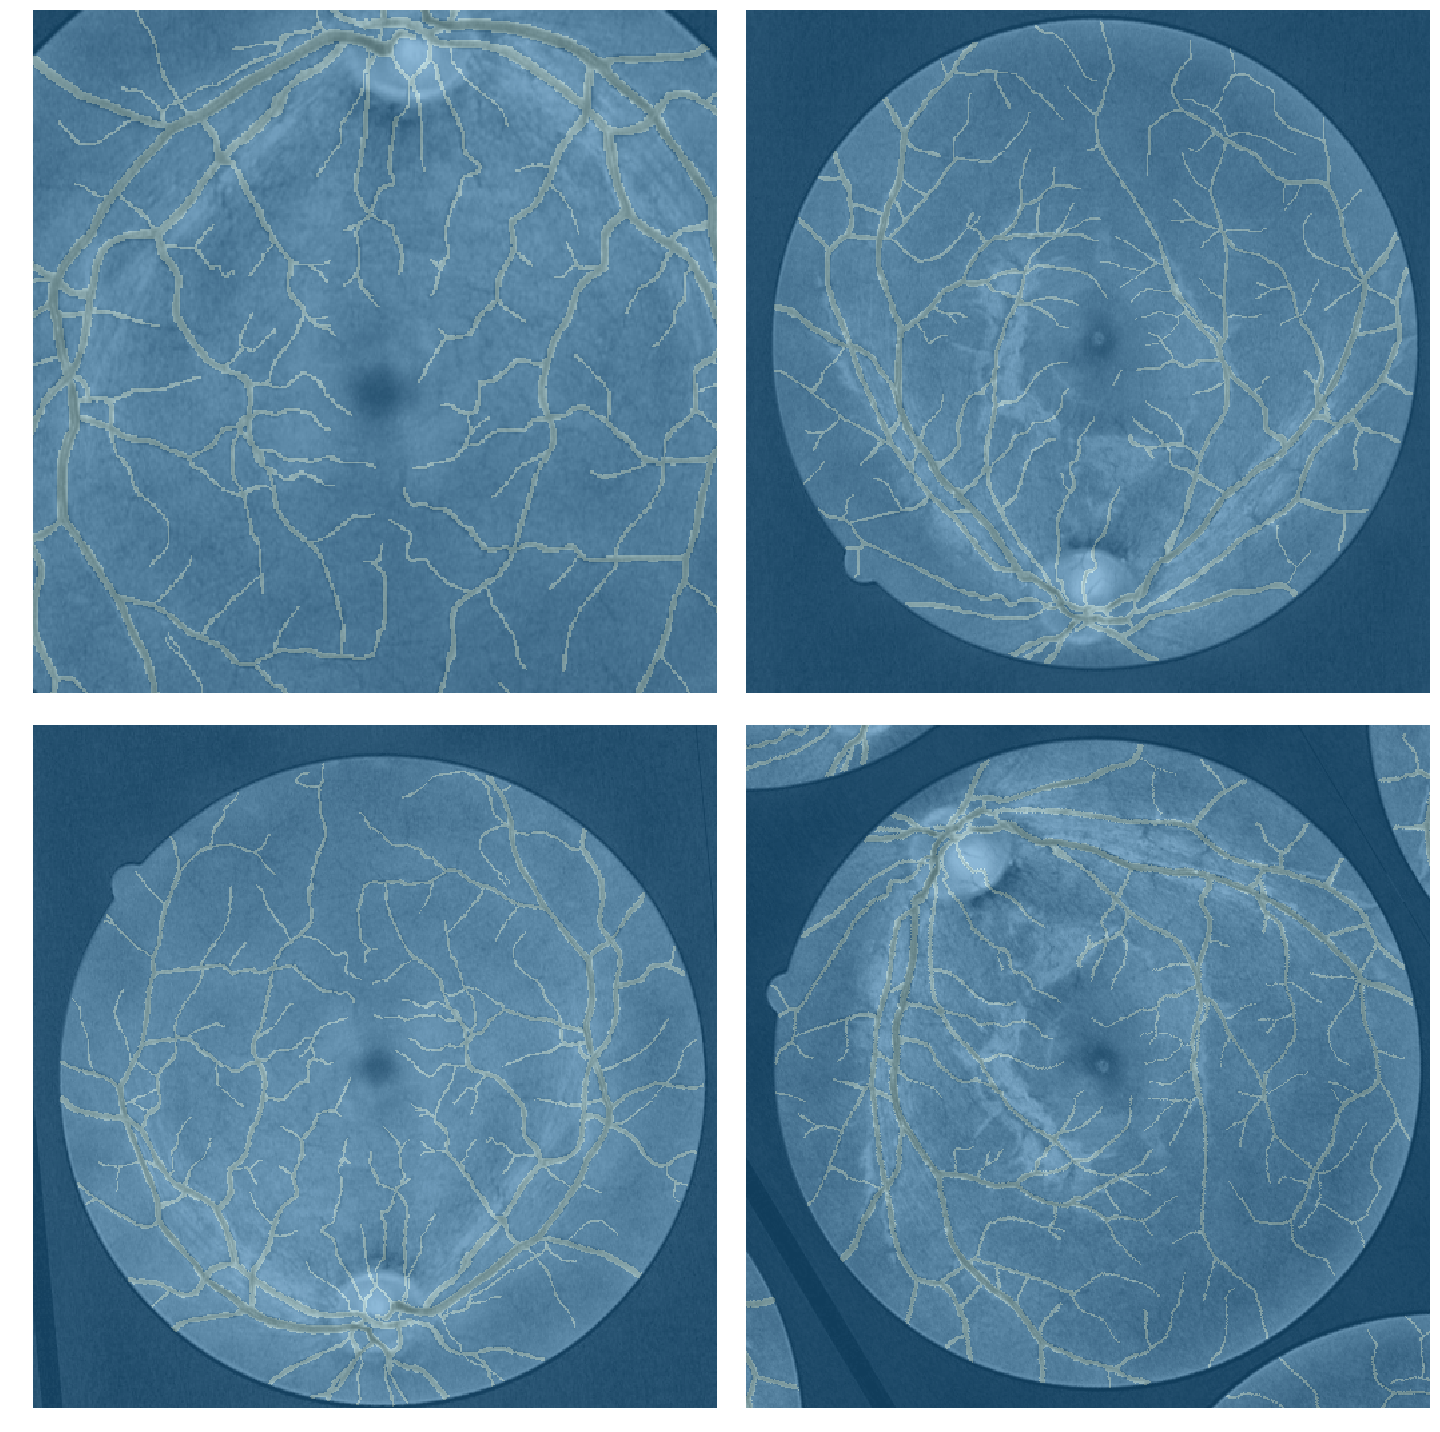

In [25]:
data.show_batch(rows=4, figsize=(20,20))

In [26]:
learn = unet_learner(data, models.resnet18, metrics=[dice])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


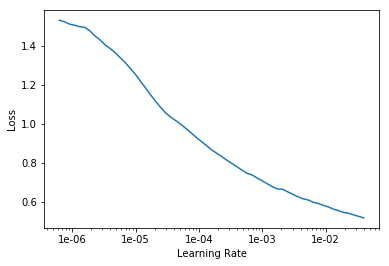

In [27]:
lr_find(learn)
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,dice,time
0,0.636929,0.419581,0.001277,00:08
1,0.611115,0.494377,0.364789,00:06
2,0.471993,0.259339,0.230634,00:06
3,0.386440,0.189759,0.438840,00:06
4,0.329443,0.168170,0.551942,00:06


In [29]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,dice,time
0,0.175170,0.157618,0.658882,00:06
1,0.165336,0.134265,0.660911,00:06
2,0.156349,0.129109,0.712333,00:06
3,0.160010,0.146415,0.676069,00:06
4,0.155410,0.125466,0.714866,00:06
5,0.149861,0.119462,0.736121,00:06
6,0.145568,0.112910,0.741941,00:06
7,0.141098,0.112142,0.739833,00:06
8,0.137941,0.110586,0.750279,00:06
9,0.134400,0.110328,0.752034,00:06


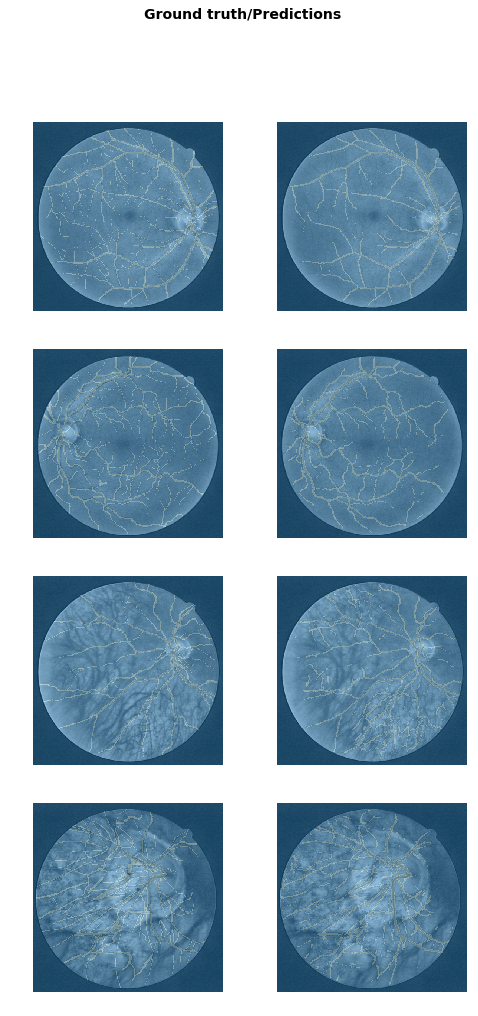

In [30]:
learn.show_results()